<a href="https://colab.research.google.com/github/Somtochukwu-Achikanu/Machine-learning-handson/blob/main/categorical_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
taiwan_real_estate = pd.read_csv('/content/taiwan_real_estate2.csv')
print(taiwan_real_estate.head())

   dist_to_mrt_m  n_convenience house_age_years  price_twd_msq
0       84.87882             10        30 to 45      11.467474
1      306.59470              9        15 to 30      12.768533
2      561.98450              5         0 to 15      14.311649
3      561.98450              5         0 to 15      16.580938
4      390.56840              5         0 to 15      13.040847


In [3]:
y = 'price_twd_msq'
X = 'house_age_years'

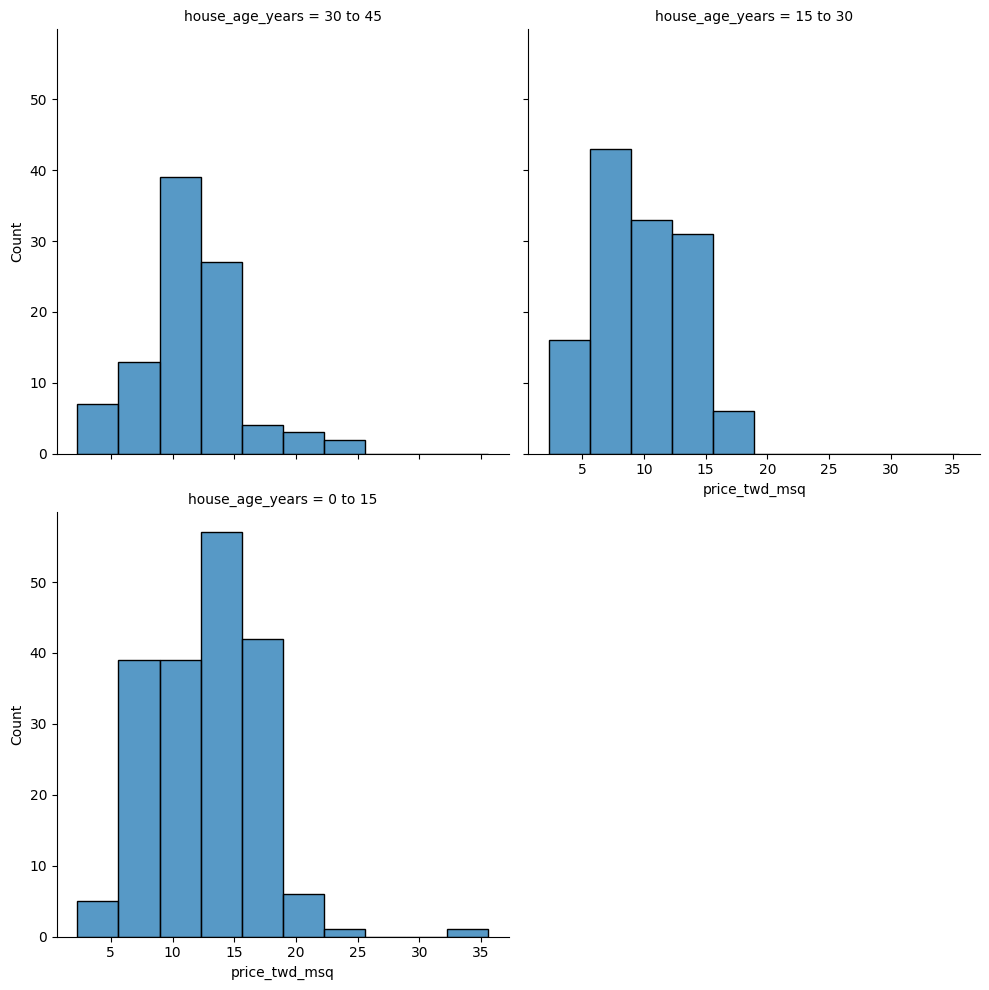

In [4]:
#Visualize

sns.displot(x='price_twd_msq', col='house_age_years', col_wrap= 2, bins = 10, data = taiwan_real_estate)
plt.show()

In [5]:
#Summary statistics

stats = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()
print(stats)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [6]:
#Linear regression
from statsmodels.formula.api import ols

age_vs_price = ols('price_twd_msq ~ house_age_years', data=taiwan_real_estate).fit()
print(age_vs_price.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [7]:
#To get rid of the intercept
age_vs_price = ols('price_twd_msq ~ house_age_years + 0', data=taiwan_real_estate).fit()
print(age_vs_price.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


making predictions

In [8]:
X = 'n_convenience'
y= 'price_twd_msq'

In [14]:
print(taiwan_real_estate['n_convenience'].value_counts())

5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: n_convenience, dtype: int64


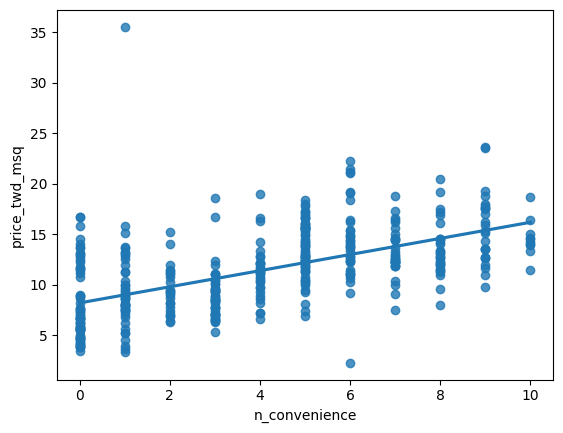

In [21]:
#Visualization

sns.regplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate,ci=None)
plt.show()

In [16]:
price_vs_conv = ols('price_twd_msq ~ n_convenience', data = taiwan_real_estate).fit()
print(price_vs_conv)

In [17]:
#making explanatory values for prediction

explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})
print(explanatory_data)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10


In [18]:
#Predictions
predict = price_vs_conv.predict(explanatory_data)
print(predict)

0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64


In [20]:
#To make it more explanatory

prediction = explanatory_data.assign(price_twd_msq = predict)
print(prediction)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


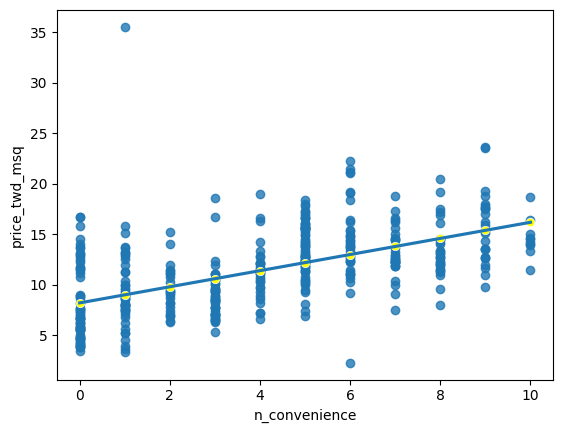

In [25]:
#Visualizing the fitted and predicted data

fig = plt.figure()

sns.regplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate,ci=None)
sns.scatterplot(x='n_convenience', y='price_twd_msq', data=prediction, color='yellow',marker='o')
plt.show()

In [29]:
#prediction for 1 and 2.5 n_convenience

impossible = pd.DataFrame({'n_convenience':[-1, 2.5]})
predictions_2 = impossible.assign(price_twd_msq = price_vs_conv.predict(impossible))
print(predictions_2)

   n_convenience  price_twd_msq
0           -1.0       7.426158
1            2.5      10.219437
